In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import afterglowpy as grb

In [2]:
my_list=[1, "hello", 3, 'a', grb.fluxDensity]

In [3]:
print(my_list)
print(my_list[0])
print(my_list[-2])

[1, 'hello', 3, 'a', <function fluxDensity at 0x000001F451661550>]
1
a


#this is just an example, get into it later on (why isnt it working?)
personnel_entry_list=["Bob, 25, "Edmonton] #confusion
personnel_entry_dict={'name':'Bob', 'age':25, 'hometown':'Edmonton'} #easier

In [5]:
t = np.array([1.0e3, 1.0e4, 1.0e5, 1.0e6])
nu = np.array([1.0e17,1.0e17,1.0e17,1.0e17])

Z = {'jetType': grb.jet.TopHat, #type of jet structure
   'specType':0,       #type of spectrum
   'thetaObs':0,      #observer angle(radians)
   'E0': 1.0e53,       #isotropic energy (erg)
   'thetaCore': 0.1,   #jet opening angle (radians)
   'n0': 1.0,          #ambient ISM density (cm^3{-3})
   'p': 2.2,           #electron energy slope (no units)
   'epsilon_e': 0.1,   #fraction of energy in accelerated electrons (no units)
   'epsilon_B': 0.1,   #fraction of energy in magnetic field (no units)
   'ksiN': 1.0,       #luminosity distancde (cm)
   'dL': 1.0e28,       #redshift (no units)
   'z': 0.5
  }

Fnu = grb.fluxDensity(t, nu, **Z)

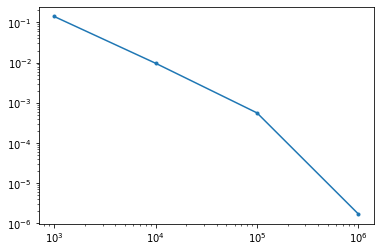

In [7]:
plt.plot(t, Fnu, marker=".")
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'Flux (mJy)')

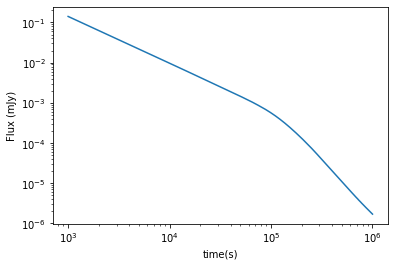

In [9]:
#Making a light curve (flux vs time in a constant wavelength)
t=np.geomspace(1.0e3, 1.0e6, 1000)
#similar to linspace, but its in log scale so itll look good scaled down
nu=np.empty(t.shape)
nu[:] = 1.0e17
#This slice takes from the beginning to the end
#You dont want to redefine nu

Fnu=grb.fluxDensity(t, nu, **Z)
#** unpacks the dictionary, * unpacks an array and lists

plt.plot(t, Fnu)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('time(s)')
plt.ylabel('Flux (mJy)')

Text(0, 0.5, 'Flux (mJy)')

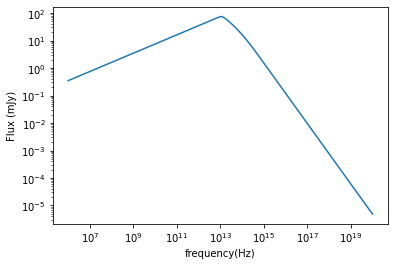

In [10]:
#Making a spectrum (nu vs flux in constant time)
nu=np.geomspace(1.0e6, 1.0e20, 100)
t=np.empty(nu.shape)
t[:] = 1.0e4

Fnu=grb.fluxDensity(t, nu, **Z)
#** unpacks the dictionary, * unpacks an array and lists

plt.plot(nu, Fnu)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('frequency(Hz)')
plt.ylabel('Flux (mJy)')